### Importar os plugins necessários (numpy, matplotlib, pandas, seaborn)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Criar DataFrame usando o CSV

In [4]:
df = pd.DataFrame(pd.read_csv("movies_clean_python.csv"))

### Usar info() para ter uma ideia geral do CSV
Base de dados possui:
- 5421 entries;
- 15 colunas;
- 08 variáveis qualitativas utilizáveis (name, rating, genre, director, writer, star, country, company);
- 06 variáveis quantitativas utilizáveis (year, score, votes, budget, gross, runtime);
- Variável "released" será ignorada.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 635.4+ KB


### Análise Coluna NAME
- Ao usar value_counts(), é possível ver que alguns nomes se repetem;
- Lembrei que vi uma análise que usava wordcloud e implementei. Acredito que essa seja a única análise interessante pra essa coluna. Essa imagem mostra as 50 palavras que mais aparecem na coluna "name".

In [6]:
df.name.value_counts().head(10)

name
Hercules           3
The Thing          2
Godzilla           2
Crash              2
Fever Pitch        2
Under Suspicion    2
Nobody's Fool      2
Safe               2
The Postman        2
Neighbors          2
Name: count, dtype: int64

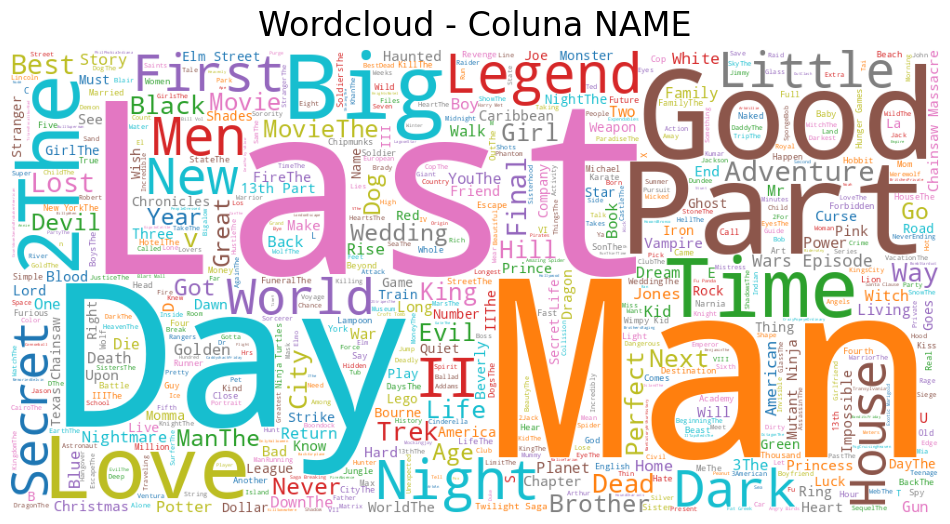

In [48]:
plt.figure(figsize=(12,8))
name_wc = WordCloud(
                    width=1000,
                    height=500,
                    max_words=1000,
                    background_color="white",
                    colormap=('tab10')
                    ).generate(''.join(df.name))
font = {##'weight': 'bold',
        'size': 24,
        }
plt.title('Wordcloud - Coluna NAME', fontdict=font, pad=10)
plt.imshow(name_wc)
plt.axis('off')
plt.show()

### Análise Coluna RATING
- Contar e plotar.

In [8]:
rating_count = df.rating.value_counts()
print(rating_count)

rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64


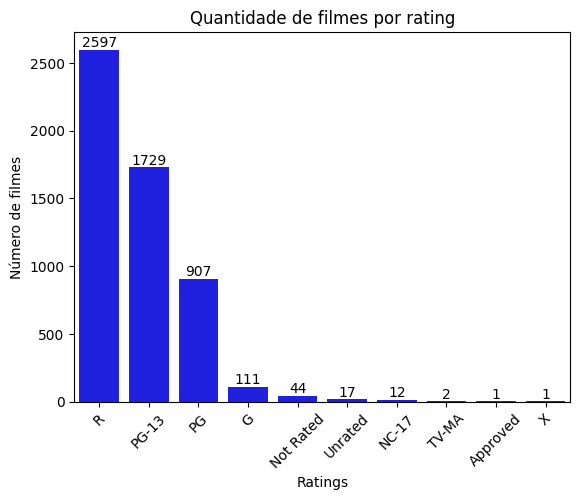

In [53]:
ax = sns.barplot(data=rating_count, color='blue')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Ratings')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por rating')
plt.xticks(rotation=45)
plt.show()